# Import Data

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('Data/bbca_data_5y.csv')

In [3]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [4]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [5]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,5633.568658,5660.523532,5615.598742,5651.538574,58420500,0.0,0.0,2019-10-31
1,5660.522959,5682.985352,5638.060566,5682.985352,42080500,0.0,0.0,2019-11-01
2,5705.447725,5732.402596,5624.583111,5638.060547,43794500,0.0,0.0,2019-11-04
3,5705.447660,5714.432617,5633.568005,5714.432617,66161500,0.0,0.0,2019-11-05
4,5732.401911,5732.401911,5656.029785,5656.029785,63393000,0.0,0.0,2019-11-06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [7]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [22]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [23]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [24]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [25]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [26]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [27]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [28]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,6002.917556,6061.504590,6002.917556,6020.944336,38188500,2019-12-26,0.003003,0.002998,6012.832715,5885.293115,5797.644263,5915.113122,5836.890965,5797.644263,138.944406,6075.533075,5519.755450,3,12
1,6011.930395,6038.970562,6011.930395,6034.463867,29945000,2019-12-27,0.002245,0.002243,6002.016406,5913.685205,5816.341333,5936.813258,5855.707432,5816.341333,144.567402,6105.476137,5527.206529,4,12
2,6020.944477,6056.998037,6011.931087,6025.451172,61168000,2019-12-30,-0.001494,-0.001495,6017.339063,5944.781348,5836.834009,5952.929242,5871.873503,5836.834009,143.659840,6124.153690,5549.514328,0,12
3,6034.464703,6111.078519,6020.944618,6029.958008,49445000,2020-01-02,0.000748,0.000748,6022.747070,5974.525586,5856.204272,5966.934472,5886.929170,5856.204272,142.195634,6140.595541,5571.813004,3,1
4,6084.038517,6129.105469,6061.505041,6129.105469,47755500,2020-01-03,0.016442,0.016309,6047.984570,6014.184570,5874.017822,5996.420108,5909.993579,5874.017822,153.099633,6180.217089,5567.818556,4,1


In [29]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [30]:
dataUsed = data[['Close', 'Volume', 'ma_5', 'ma_10', 'ema_10', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'day_of_week', 'month']]

In [31]:
dataUsed.head()

,Close,Volume,ma_5,ma_10,ema_10,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,6020.944336,38188500,6012.832715,5885.293115,5915.113122,5797.644263,138.944406,6075.533075,5519.755450,3,12
1,6034.463867,29945000,6002.016406,5913.685205,5936.813258,5816.341333,144.567402,6105.476137,5527.206529,4,12
2,6025.451172,61168000,6017.339063,5944.781348,5952.929242,5836.834009,143.659840,6124.153690,5549.514328,0,12
3,6029.958008,49445000,6022.747070,5974.525586,5966.934472,5856.204272,142.195634,6140.595541,5571.813004,3,1
4,6129.105469,47755500,6047.984570,6014.184570,5996.420108,5874.017822,153.099633,6180.217089,5567.818556,4,1


In [32]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(dataUsed)

data_scaled


array([[0.29150399, 0.05048507, 0.27207966, ..., 0.2612121 , 0.75      ,
        1.        ],
       [0.29344727, 0.03958719, 0.27045365, ..., 0.26236776, 1.        ,
        1.        ],
       [0.2921518 , 0.08086389, 0.27275709, ..., 0.26582772, 0.        ,
        1.        ],
       ...,
       [0.93531759, 0.06567692, 0.96767917, ..., 0.99948838, 0.25      ,
        0.81818182],
       [0.91375679, 0.15134759, 0.9586594 , ..., 0.99624454, 0.5       ,
        0.81818182],
       [0.89938292, 0.12896526, 0.94512975, ..., 0.99061983, 0.75      ,
        0.81818182]])

## Train Test Sequence

In [33]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 1:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [34]:
print(x.shape, y.shape)

(1115, 60, 10) (1115,)


## LSTM

LSTM (Long Short-Term Memory) adalah jenis jaringan saraf tiruan yang termasuk dalam kategori Recurrent Neural Networks (RNN). LSTM dirancang khusus untuk mengatasi masalah pada RNN biasa, yaitu sulitnya mengingat informasi dalam jangka panjang (long-term dependency).

In [35]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [37]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# train model 
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
28/28 [==============================] - 7s 79ms/step - loss: 0.0371 - val_loss: 0.0027
Epoch 2/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 3/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 4/100
28/28 [==============================] - 1s 33ms/step - loss: 0.0049 - val_loss: 0.0012
Epoch 5/100
28/28 [==============================] - 1s 36ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 6/100
28/28 [==============================] - 1s 36ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 7/100
28/28 [==============================] - 1s 33ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 8/100
28/28 [==============================] - 1s 32ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 9/100
28/28 [==============================] - 1s 32ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 10/100
28/28 [==============================] - 1s 31ms/step - loss: 0.0042 - val_loss: 0.0012

In [39]:
# prediction
predicted_prices =  model.predict(x_test)


7/7 [==============================] - 1s 12ms/step


In [40]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0]

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [41]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [42]:
real_prices

array([ 4.13849146,  4.25513498, 10.97226836,  8.64558647,  8.32580999,
        6.37465005,  8.76094996,  3.68138249,  2.68938599,  3.97629252,
       11.76283116,  3.68247723, 10.10314802,  6.41163743,  7.1170858 ,
       10.57698697, 10.65604325,  3.06632618,  4.27119947,  4.1090013 ,
        3.87094771,  3.45776285,  8.83785844,  2.7691232 ,  5.65247634,
        8.64558647, 11.0117965 ,  8.91476538,  8.33795254,  4.31543701,
        5.59828882,  7.1170858 ,  4.13849146,  8.37640601,  7.83061659,
        3.57374551,  9.13720381,  8.64558647,  7.58032471,  8.99586137,
        3.76248311,  8.72249495, 11.52566232,  6.55377583,  7.429521  ,
        8.18413403,  8.91476538, 10.33981813,  3.90719085, 11.05132464,
        4.61130514,  6.1031257 ,  6.18971395,  4.0131556 ,  2.90685175,
        5.74574268,  7.22975026,  3.53025143,  9.66783975,  4.35230009,
        4.61130514,  4.30069116,  8.18413403,  8.56867798,  6.14067975,
        7.1170858 ,  7.58032471,  8.29949753,  4.74944981,  5.56

# Evaluation

In [58]:
# conpare real and predicted prices
import plotly.express as px

fig = px.line(x=data['date'][-len(real_prices):], y=real_prices, title='Real Prices vs Predicted Prices')
fig.add_scatter(x=data['date'][-len(predicted_prices):], y=predicted_prices, mode='lines')

fig.show()

In [59]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

0.48697831213803355

In [60]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

0.39635868493910936

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [61]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

0.9594594594594594

# Close Only

In [62]:
data_used = data.filter(['Close'])

dataset = data_used.values

training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

940

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29150399],
       [0.29344727],
       [0.2921518 ],
       ...,
       [0.93531759],
       [0.91375679],
       [0.89938292]])

In [64]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.29150399, 0.29344727, 0.2921518 , 0.29279961, 0.30705093,
       0.29862973, 0.29927753, 0.29150399, 0.29927753, 0.29733404,
       0.29992527, 0.31611995, 0.31158537, 0.31352865, 0.31676775,
       0.31158537, 0.31093756, 0.31223311, 0.31223311, 0.30834655,
       0.31223311, 0.30575532, 0.30510744, 0.29927753, 0.2655925 ,
       0.26041026, 0.28113951, 0.29798192, 0.29927753, 0.30186862,
       0.30510744, 0.30445964, 0.30705093, 0.30575532, 0.29150399,
       0.29668617, 0.29344727, 0.29344727, 0.2804917 , 0.28308293,
       0.27142255, 0.27207035, 0.25781917, 0.24097669, 0.24097669,
       0.21376965, 0.24486339, 0.26041026, 0.25976245, 0.22931659,
       0.17555018, 0.1936882 , 0.18397145, 0.14639979, 0.14639979,
       0.14639979, 0.08939469, 0.07384775, 0.02850269, 0.03951505])]
[0.0]

[array([0.29150399, 0.29344727, 0.2921518 , 0.29279961, 0.30705093,
       0.29862973, 0.29927753, 0.29150399, 0.29927753, 0.29733404,
       0.29992527, 0.31611995, 0.31158537, 0.313528

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=5, epochs=30)

Epoch 1/30
176/176 [==============================] - 5s 16ms/step - loss: 0.0046
Epoch 2/30
176/176 [==============================] - 3s 17ms/step - loss: 9.3798e-04
Epoch 3/30
176/176 [==============================] - 3s 16ms/step - loss: 9.0300e-04
Epoch 4/30
176/176 [==============================] - 3s 16ms/step - loss: 6.9981e-04
Epoch 5/30
176/176 [==============================] - 3s 16ms/step - loss: 6.5463e-04
Epoch 6/30
176/176 [==============================] - 3s 16ms/step - loss: 5.2874e-04
Epoch 7/30
176/176 [==============================] - 3s 16ms/step - loss: 5.6460e-04
Epoch 8/30
176/176 [==============================] - 3s 16ms/step - loss: 4.4440e-04
Epoch 9/30
176/176 [==============================] - 3s 16ms/step - loss: 3.9527e-04
Epoch 10/30
176/176 [==============================] - 3s 16ms/step - loss: 3.7857e-04
Epoch 11/30
176/176 [==============================] - 3s 15ms/step - loss: 4.5611e-04
Epoch 12/30
176/176 [==============================] - 3

In [66]:
test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


295
8/8 [==============================] - 1s 12ms/step


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = dataset[training_data_len:, :]
test = predictions[:-1, 0]

rmse = np.sqrt(np.mean(predictions - y_test)**2)
mae = mean_absolute_error(predictions, y_test)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  136.6410738031915
MAE:  154.90757978723406


C:\Users\thari\AppData\Local\Temp\ipykernel_5296\4018437278.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



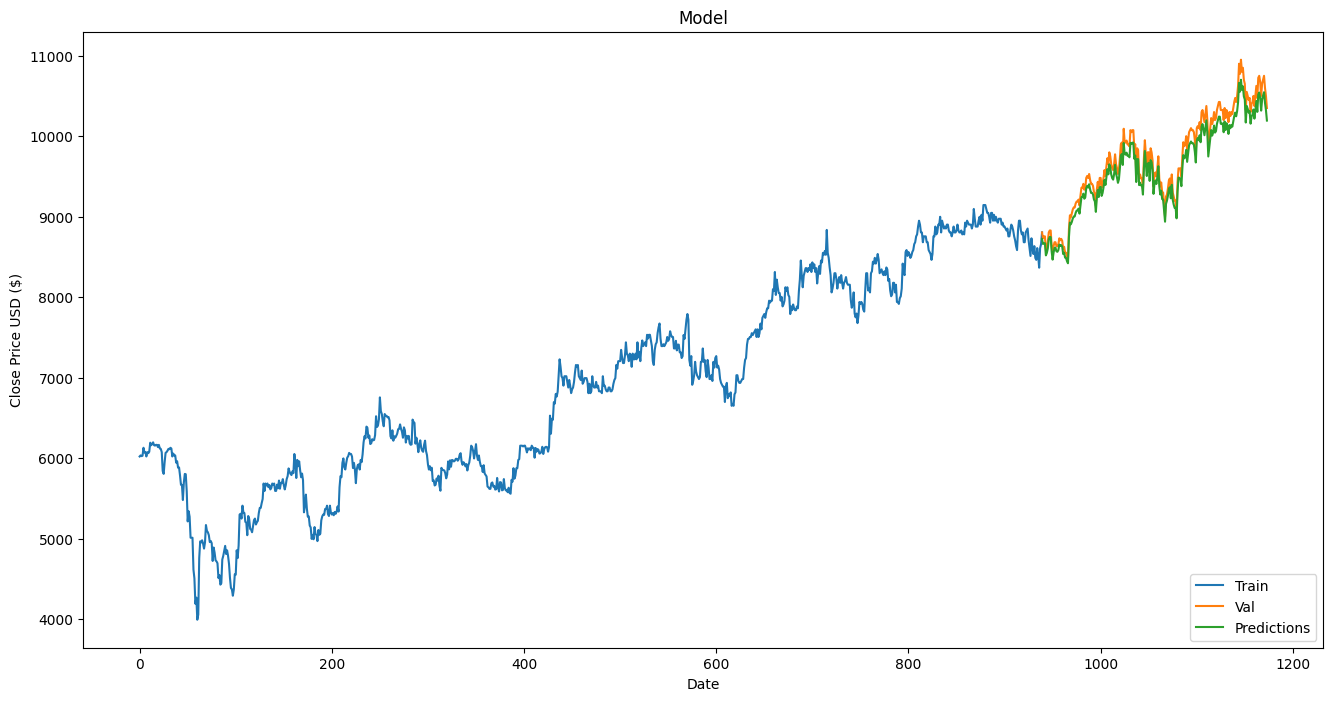

In [68]:
import matplotlib.pyplot as plt

train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [69]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news sentiment siebert

In [93]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed

C:\Users\thari\AppData\Local\Temp\ipykernel_5296\412406848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-12-26,6020.944336
2019-12-27,6034.463867
2019-12-30,6025.451172
2020-01-02,6029.958008
2020-01-03,6129.105469
...,...
2024-10-25,10750.000000
2024-10-28,10600.000000
2024-10-29,10500.000000


In [94]:
news = pd.read_csv('Data/bbca sentiment analysis.csv')
# delete columns except date and sentiment and title
news = news[['publish_date', 'sentiment', 'title']]
news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

# hanya gunakan data diatas tanggal 2019-12-17

news = news[news.index >= '2019-12-17']

news

,sentiment,title
date,,
2024-11-28 08:51:00,NEGATIVE,IHSG Hari Ini Diprediksi Melemah di Level 7.20...
2024-11-19 08:49:00,POSITIVE,IHSG Hari Ini Diramal Bergerak di Level 7.100-...
2024-11-11 12:45:00,NEGATIVE,Berapa Harga Saham BBCA Hari Ini?
2024-10-29 08:30:00,POSITIVE,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...
2024-10-29 07:45:00,NEGATIVE,BCA Pemberi Utang Terbesar ke Sritex Respons s...
...,...,...
2020-02-19 08:51:00,POSITIVE,IHSG Berpotensi Menguat Pagi Ini
2020-01-30 13:49:00,NEGATIVE,BCA dan Bank Mandiri Angkat Suara soal M-Banki...
2020-01-17 08:55:00,POSITIVE,IHSG Berpeluang Menguat ke 6.325


In [95]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [96]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,sentiment,title
date,,,
2019-12-26,6020.944336,NaN,NaN
2019-12-27,6034.463867,NaN,NaN
2019-12-30,6025.451172,NaN,NaN
2020-01-02,6029.958008,NaN,NaN
2020-01-03,6129.105469,NaN,NaN
...,...,...,...
2024-10-25,10750.000000,NaN,NaN
2024-10-28,10600.000000,NaN,NaN
2024-10-29,10500.000000,POSITIVE,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...


In [97]:
dfMerge['sentiment'].value_counts()

sentiment
POSITIVE    116
NEGATIVE     56
Name: count, dtype: int64

In [98]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                   Close sentiment  \
2019-12-26   6020.944336  POSITIVE   
2019-12-27   6034.463867       NaN   
2019-12-30   6025.451172       NaN   
2020-01-02   6029.958008       NaN   
2020-01-03   6129.105469       NaN   
...                  ...       ...   
2024-10-25  10750.000000  NEGATIVE   
2024-10-28  10600.000000       NaN   
2024-10-29  10500.000000       NaN   
2024-10-30  10350.000000  POSITIVE   
2024-10-31  10250.000000       NaN   

                                                        title  
2019-12-26  Menebak Jumlah Harta Duo Hartono Jika Harga Sa...  
2019-12-27                                                NaN  
2019-12-30                                                NaN  
2020-01-02                                                NaN  
2020-01-03                                                NaN  
...                                                       ...  
2024-10-25  Bos Buruh Ungkap Sritex Pailit Gara-gara Sulit...  
2024-10-28                     

sentiment
POSITIVE    121
NEGATIVE     61
Name: count, dtype: int64

In [99]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
0.0    1177
Name: count, dtype: int64

In [100]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.29150399, 0.        ],
       [0.29344727, 0.        ],
       [0.2921518 , 0.        ],
       ...,
       [0.93531759, 0.        ],
       [0.91375679, 0.        ],
       [0.89938292, 0.        ]])

In [101]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (880, 60, 2)


In [102]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30
176/176 [==============================] - 6s 16ms/step - loss: 0.0031
Epoch 2/30
176/176 [==============================] - 3s 16ms/step - loss: 0.0011
Epoch 3/30
176/176 [==============================] - 3s 17ms/step - loss: 8.2760e-04
Epoch 4/30
176/176 [==============================] - 3s 17ms/step - loss: 7.5442e-04
Epoch 5/30
176/176 [==============================] - 3s 16ms/step - loss: 6.5444e-04
Epoch 6/30
176/176 [==============================] - 3s 16ms/step - loss: 6.5541e-04
Epoch 7/30
176/176 [==============================] - 3s 16ms/step - loss: 5.2359e-04
Epoch 8/30
176/176 [==============================] - 3s 16ms/step - loss: 4.7004e-04
Epoch 9/30
176/176 [==============================] - 3s 16ms/step - loss: 4.3462e-04
Epoch 10/30
176/176 [==============================] - 3s 16ms/step - loss: 5.5118e-04
Epoch 11/30
176/176 [==============================] - 3s 16ms/step - loss: 3.8857e-04
Epoch 12/30
176/176 [==============================] - 3s 16

In [103]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 13ms/step


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = dataset[training_data_len:, :]
test = predictions[:-1, 0]

rmse = np.sqrt(np.mean(predictions - y_test)**2)
mae = mean_absolute_error(predictions, y_test)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  22.826637300531914
MAE:  99.15491190159574


C:\Users\thari\AppData\Local\Temp\ipykernel_5296\1510546548.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



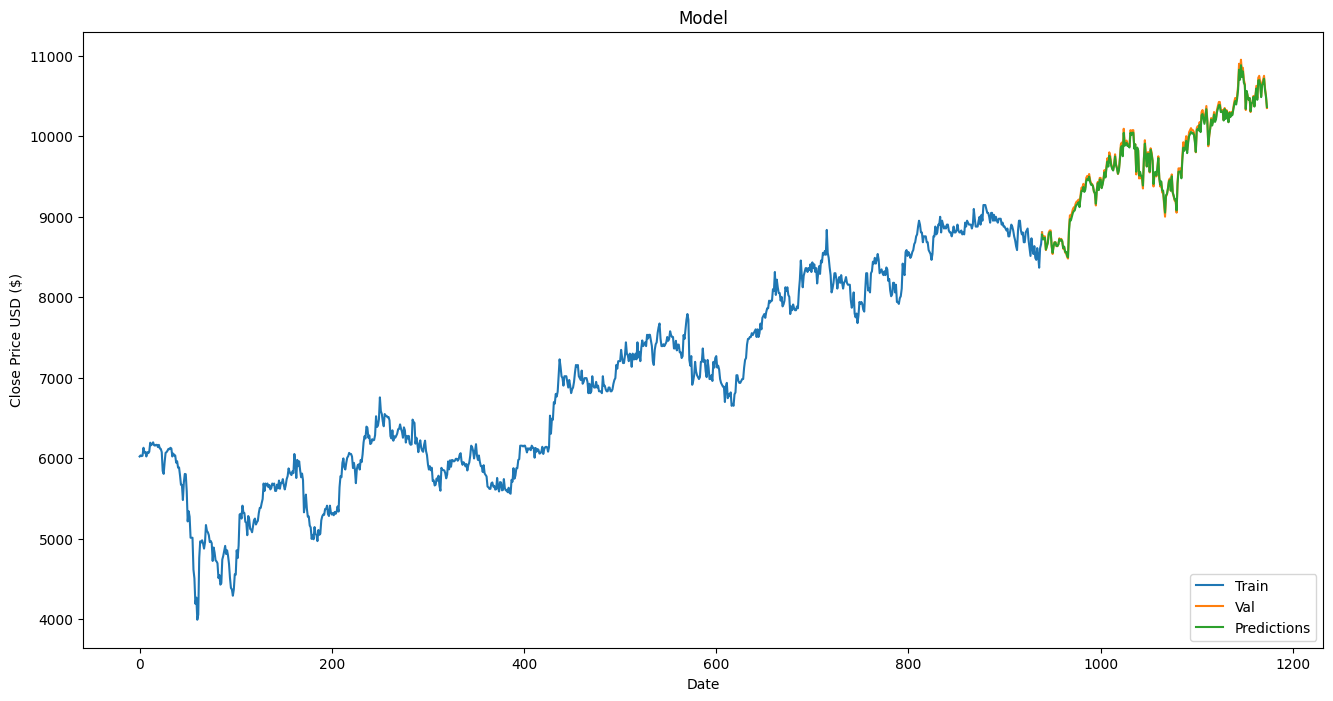

In [111]:
train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [112]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()